# Plotting distributions
First, import relevant libraries:

In [34]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import *

In [35]:
import sys
sys.path.append('../../src/')
from utils.database import dbutils

conn = dbutils.connect()
cursor = conn.cursor()

Then, load the data (takes a few moments):

In [36]:
dfc = pd.read_sql('select * from optourism.foreigners_counts', con=conn)
dfc.head()

,cust_id,country,calls,calls_in_florence_comune,days_active,days_active_in_florence_comune
0,25304,Australia,430960,21469,106,106
1,4794145,Germany,49135,4,37,1
2,18418469,Sweden,48094,250,116,58
3,3665186,Sweden,45927,207,88,37
4,10668243,Montenegro,44134,561,96,80


In [37]:
def frequency(dataframe,columnname):
    out = dataframe[columnname].value_counts().to_frame()
    out.columns = ['frequency']
    out.index.name = columnname
    out.reset_index(inplace=True)
    out = out.sort_values(columnname)
    out['cumulative'] = out['frequency'].cumsum()/out['frequency'].sum()
    out['ccdf'] = 1 - out['cumulative']
    return out

In [38]:
# 1.1, 1.2, 1.3
frc_ua = frequency(dfc,'calls')
frc_uc = frequency(dfc,'calls_in_florence_comune')
frc_da = frequency(dfc,'days_active')
frc_dc = frequency(dfc,'days_active_in_florence_comune')

frc2 = frequency(dfc[dfc['calls_in_florence_comune']>0],'calls')

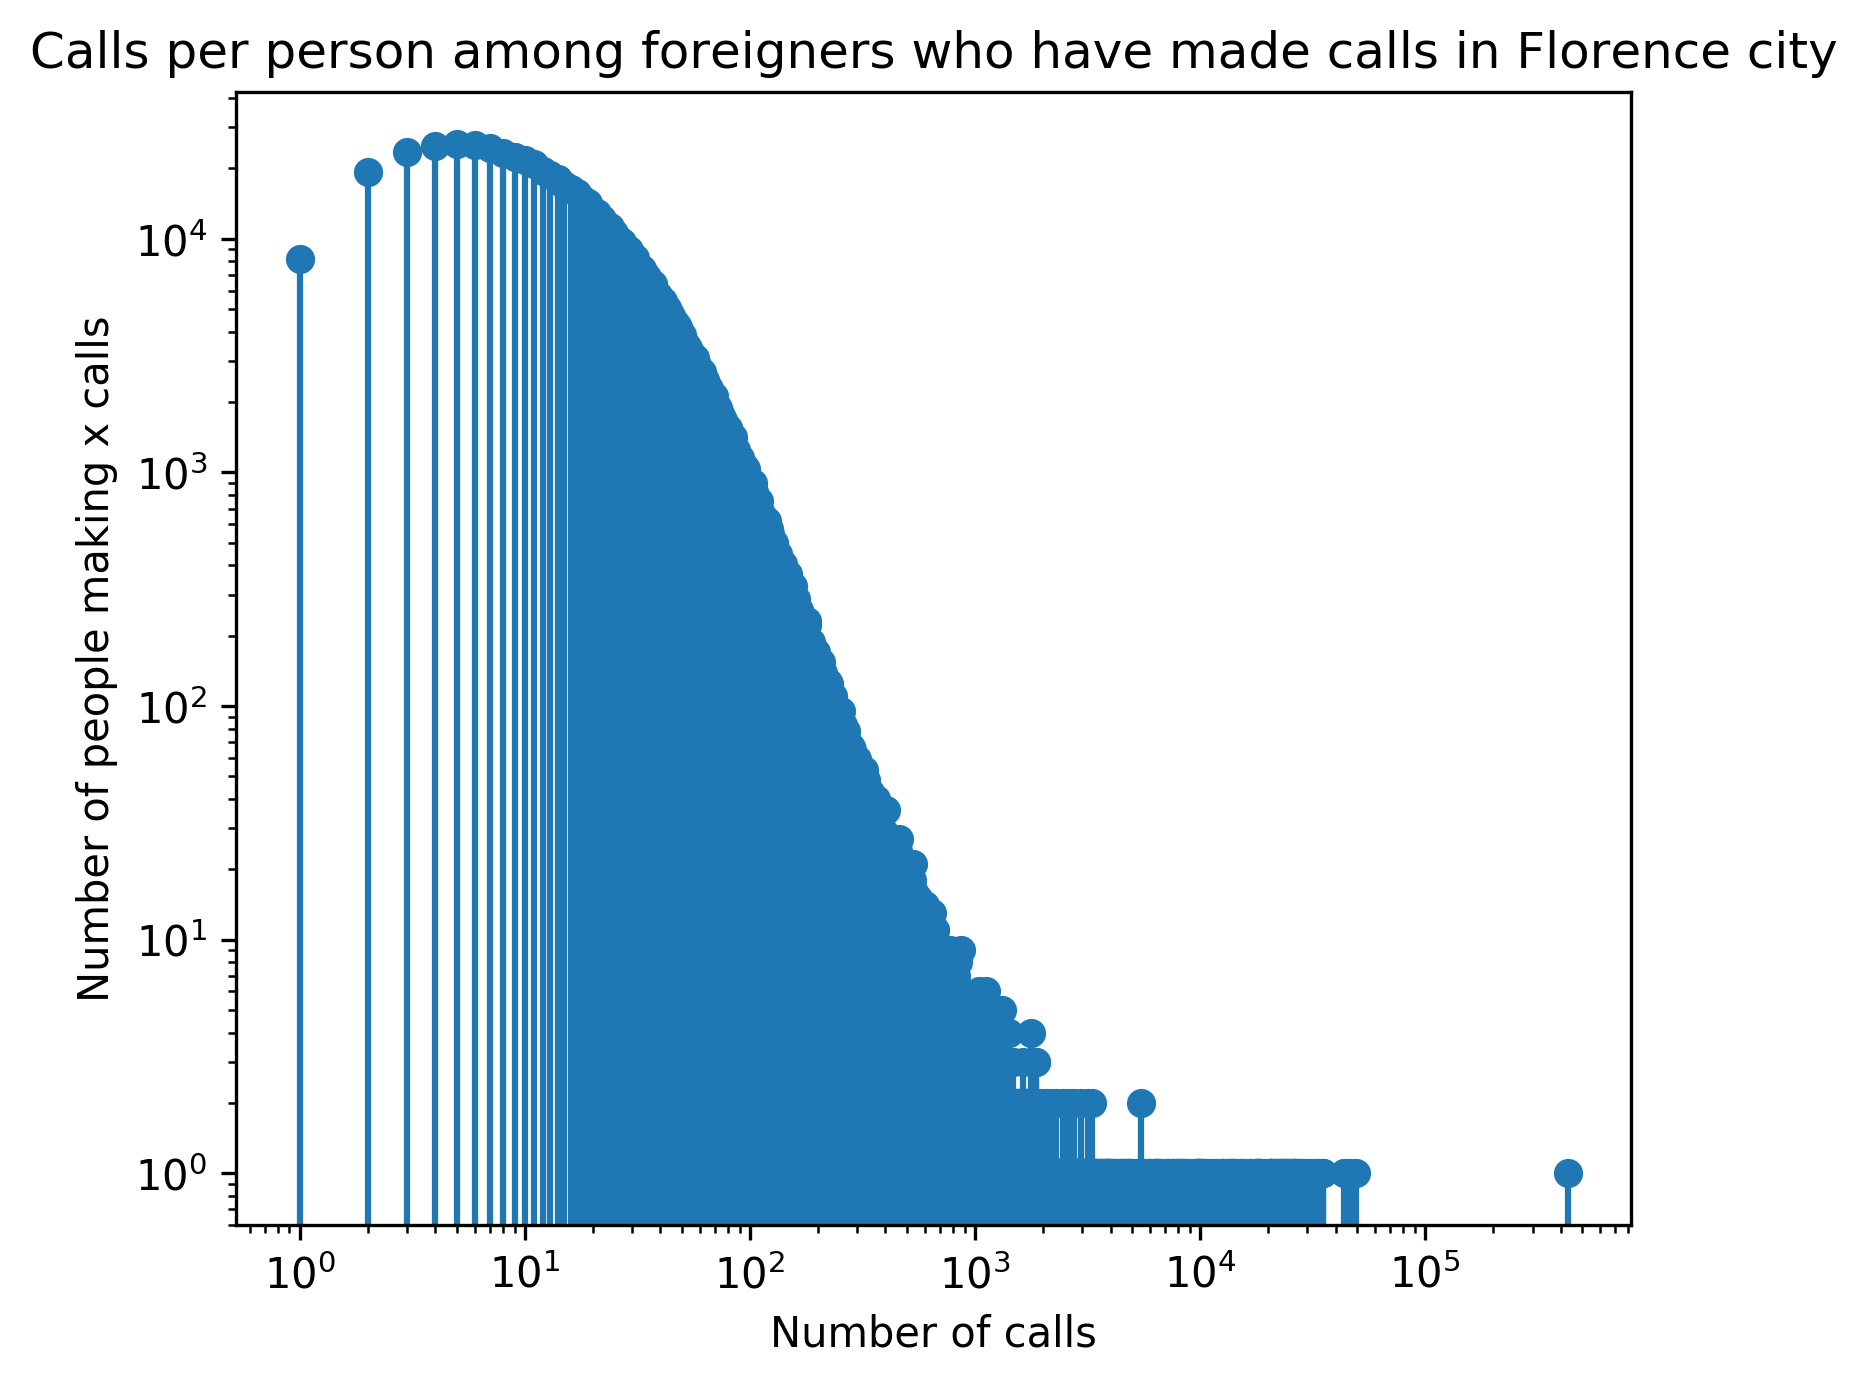

In [39]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.stem(frc2['calls'],frc2['frequency'], linestyle='steps--')
yscale('log')
xscale('log')
ax.set_title('Calls per person among foreigners who have made calls in Florence city')
ax.set_ylabel('Number of people making x calls')
ax.set_xlabel('Number of calls')
plt.show()

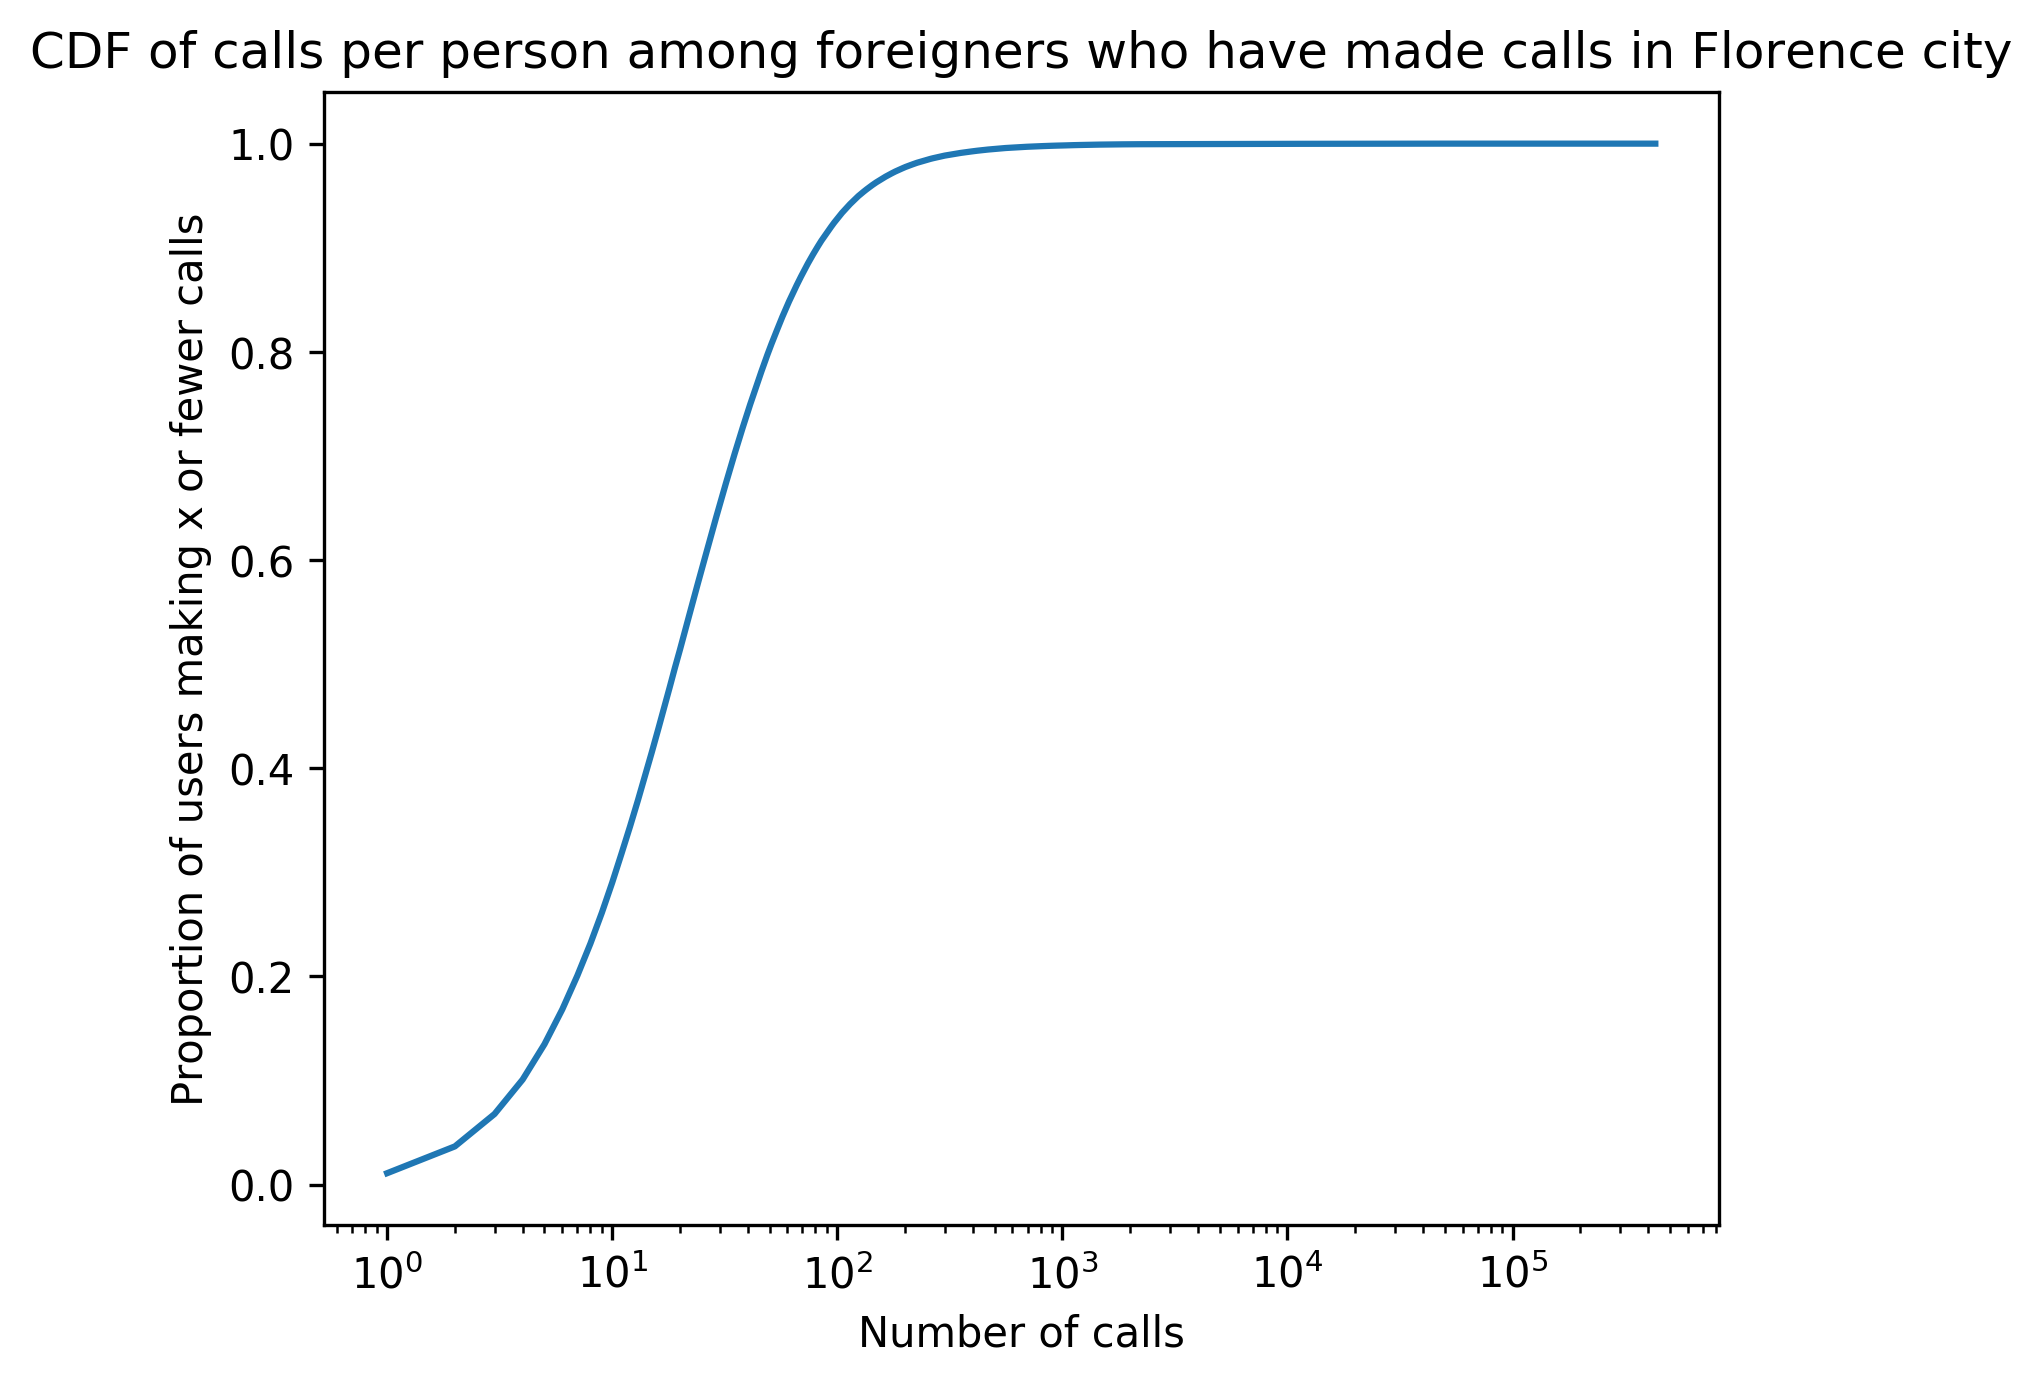

In [40]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.plot(frc2['calls'],frc2['cumulative'])
# yscale('log')
xscale('log')
# ylim([.7,1.01])
ax.set_title('CDF of calls per person among foreigners who have made calls in Florence city')
ax.set_ylabel('Proportion of users making x or fewer calls')
ax.set_xlabel('Number of calls')
# axvline(4.5) # Our cutoff
# axhline(.1)
plt.show()

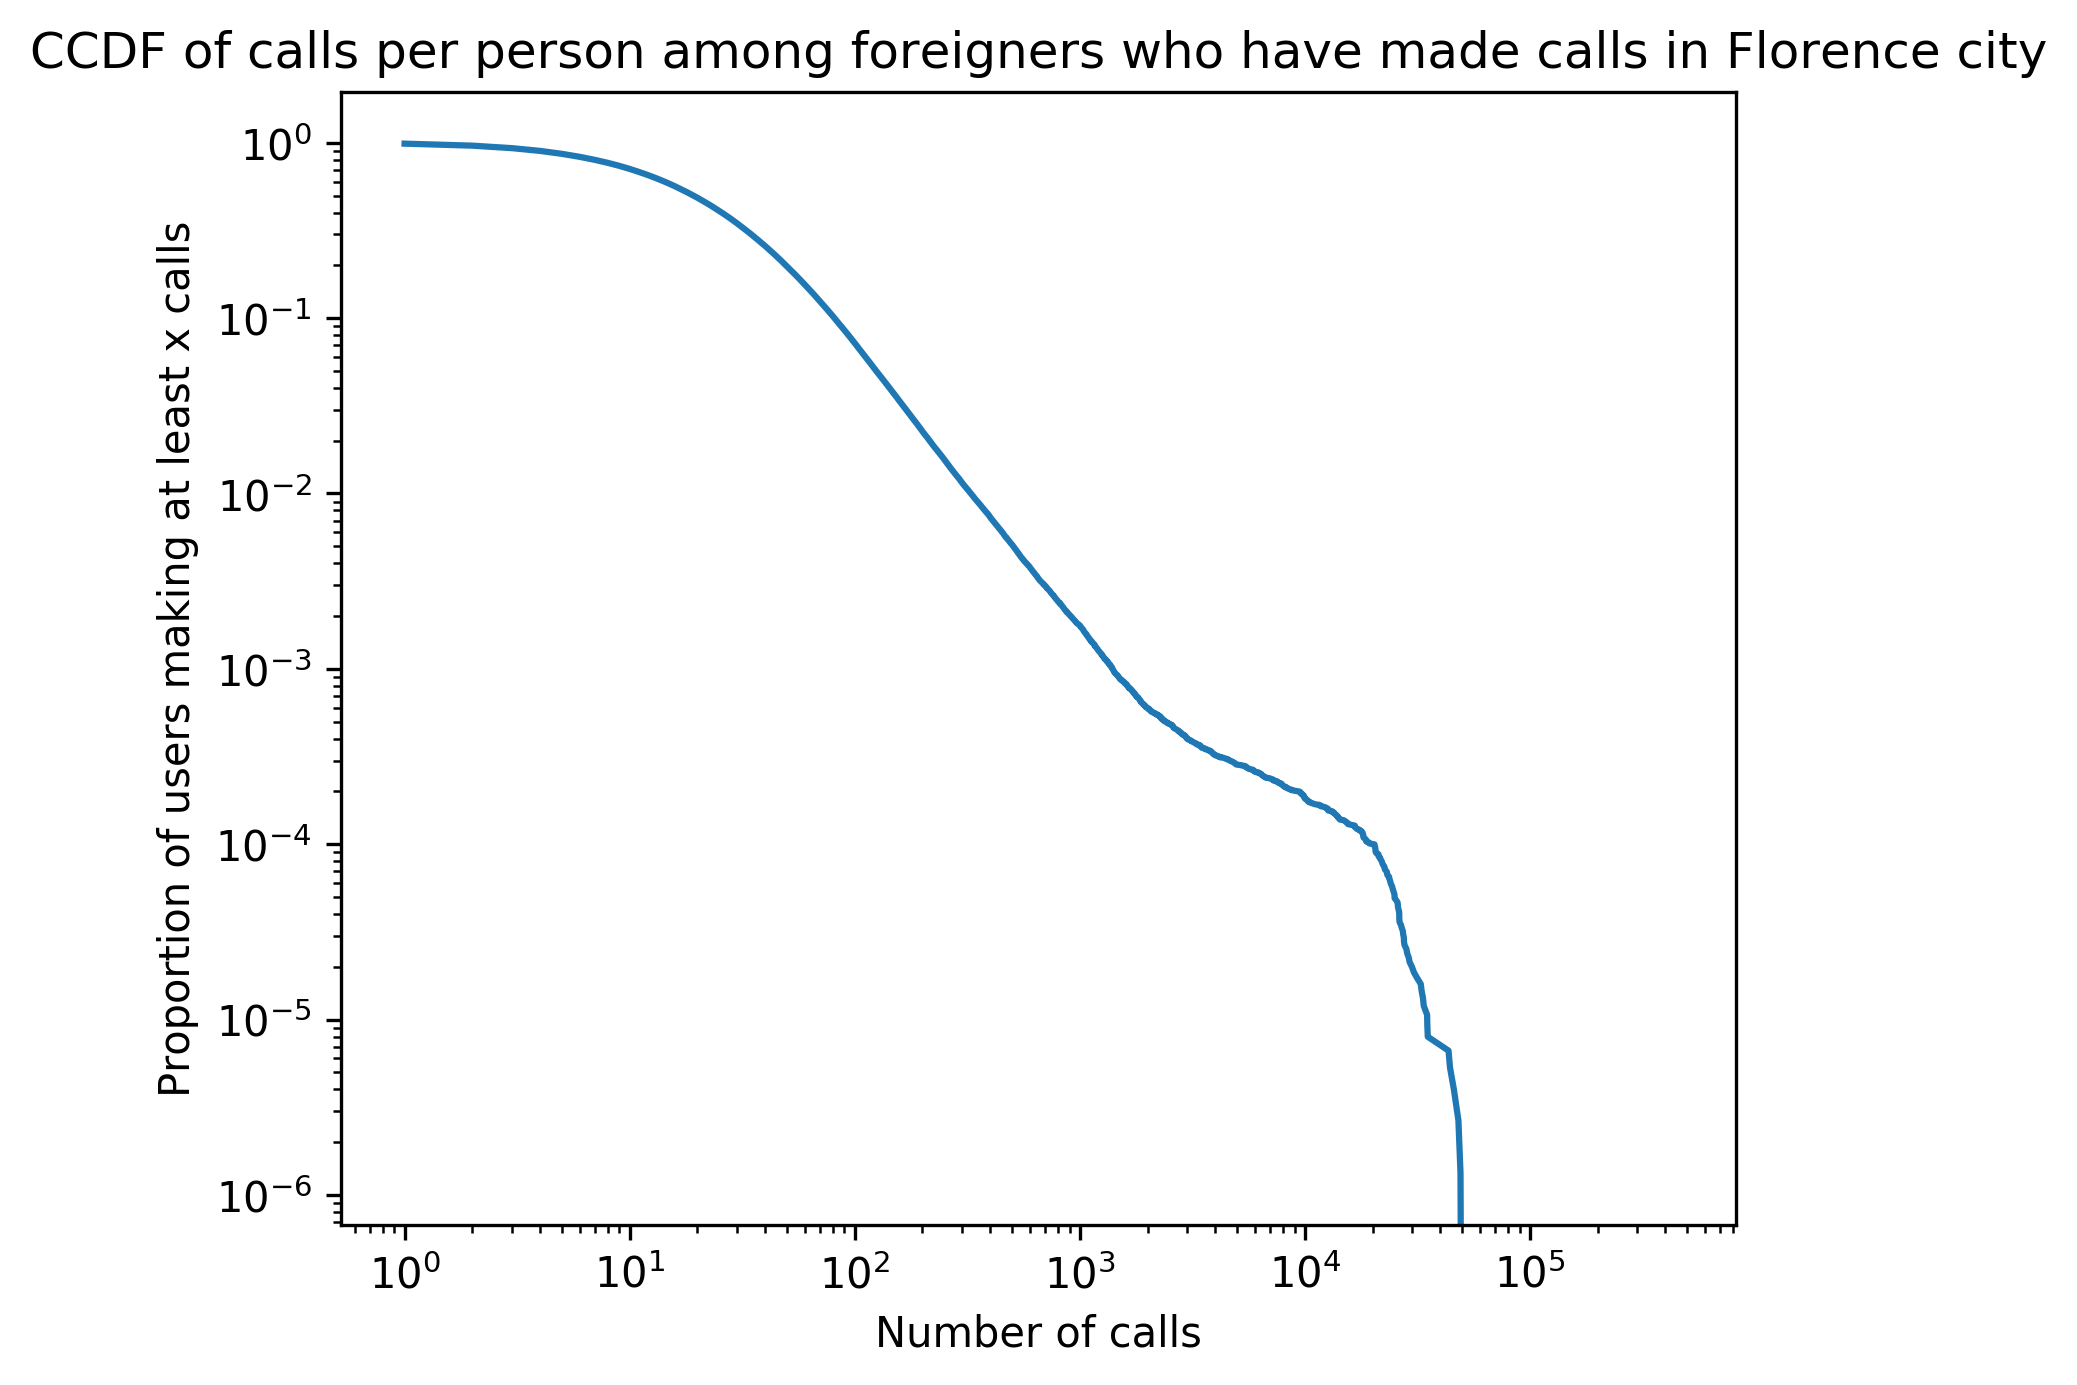

In [41]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.plot(frc2['calls'],frc2['ccdf'])
yscale('log')
xscale('log')
ax.set_title('CCDF of calls per person among foreigners who have made calls in Florence city')
ax.set_ylabel('Proportion of users making at least x calls')
ax.set_xlabel('Number of calls')
plt.show()

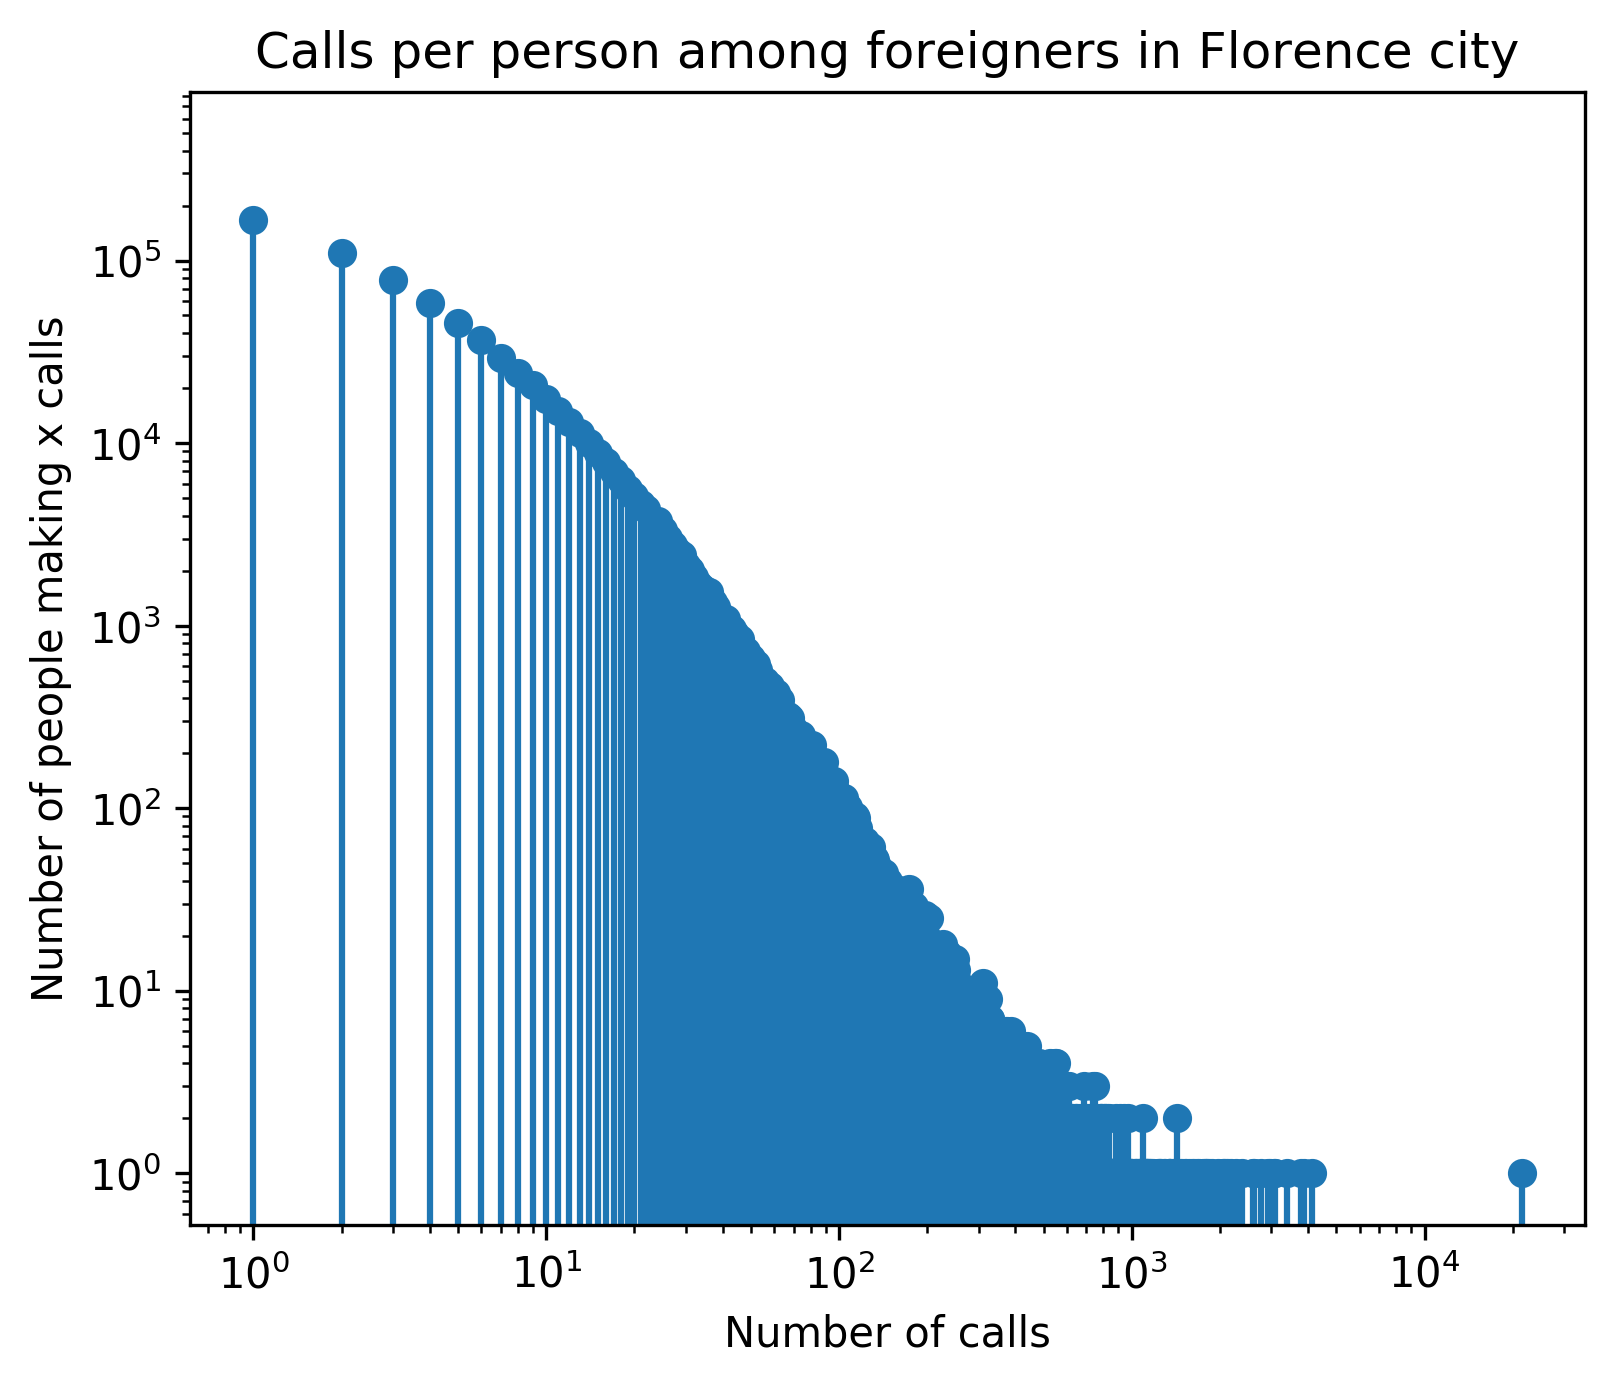

In [42]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.stem(frc_uc['calls_in_florence_comune'],frc_uc['frequency'], linestyle='steps--')
yscale('log')
xscale('log')
ax.set_title('Calls per person among foreigners in Florence city')
ax.set_ylabel('Number of people making x calls')
ax.set_xlabel('Number of calls')
plt.show()

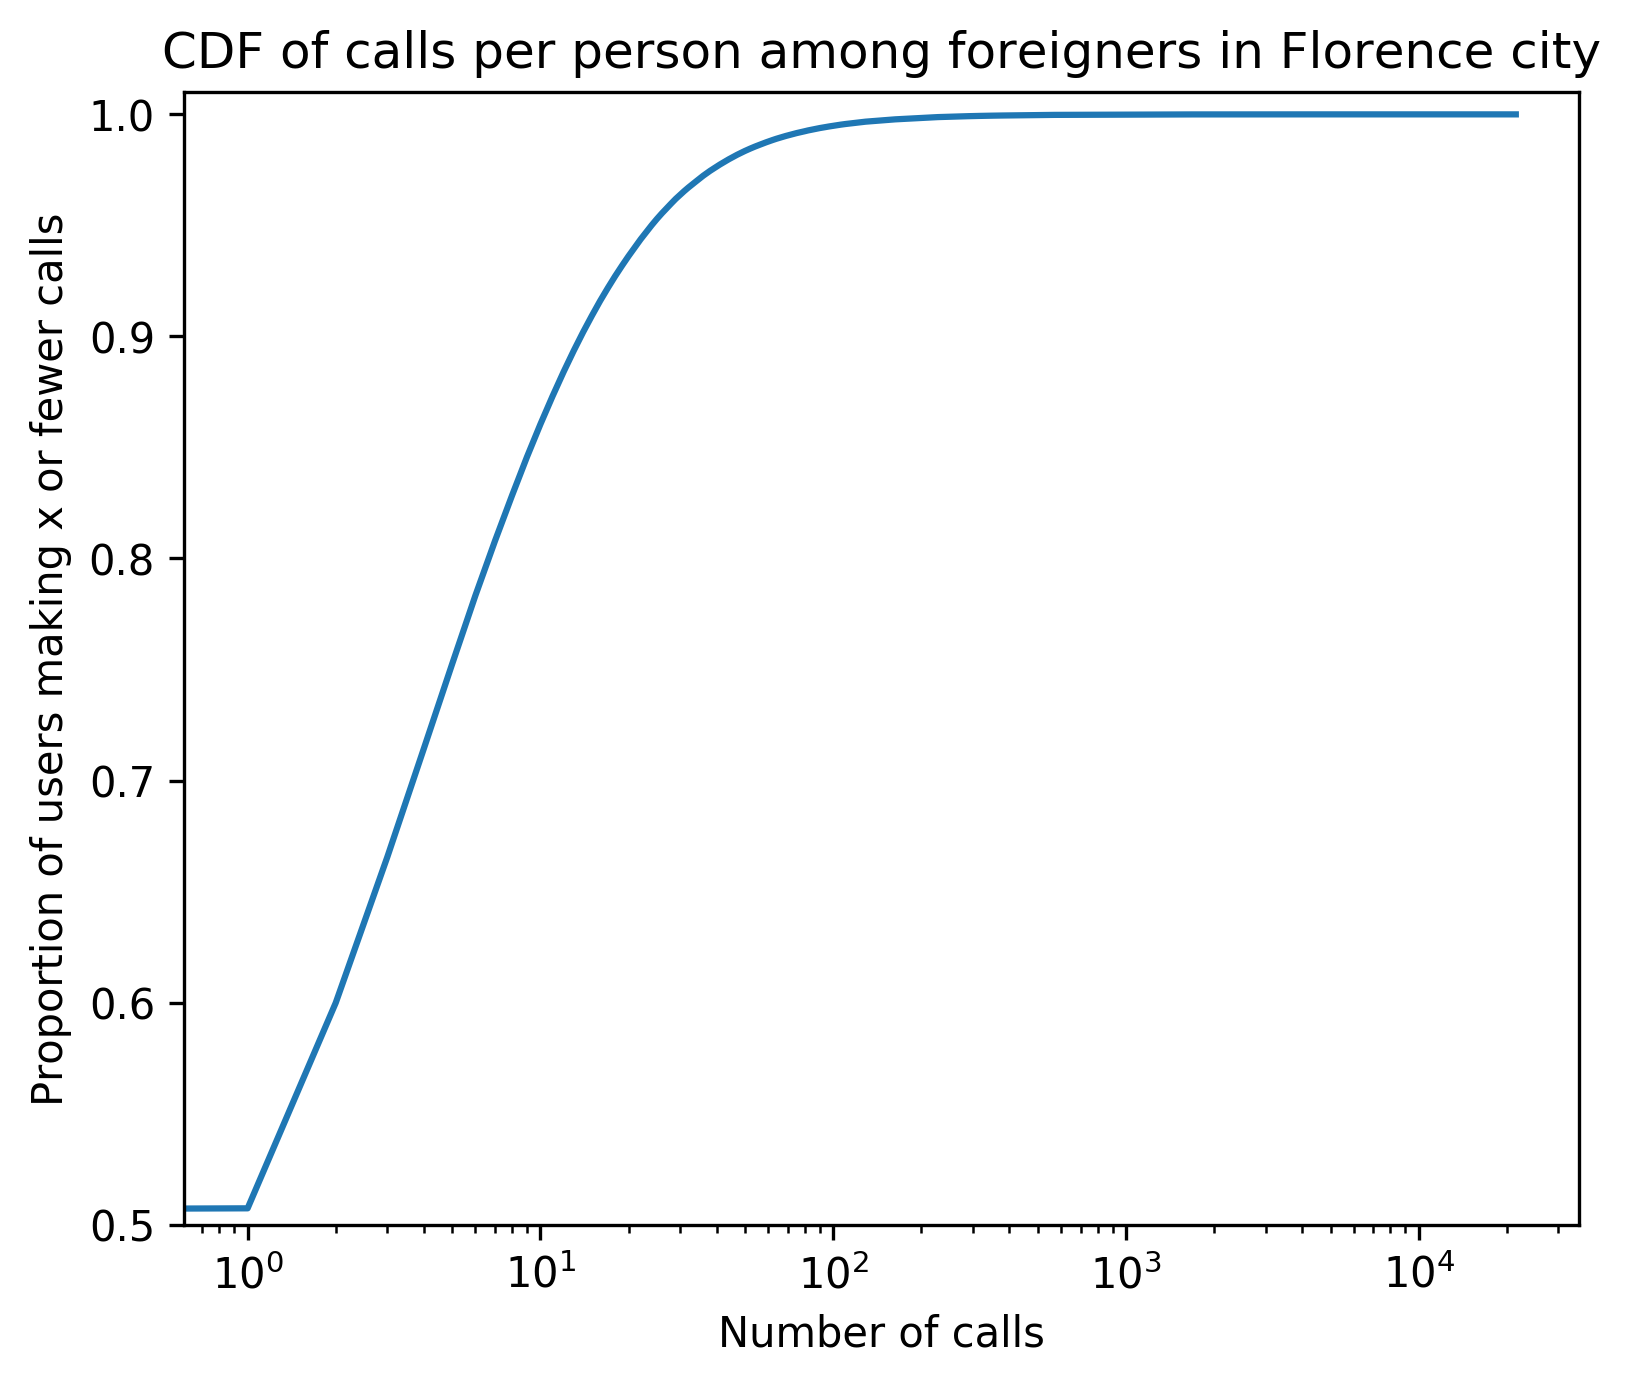

In [43]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.plot(frc_uc['calls_in_florence_comune'],frc_uc['cumulative'])
# yscale('log')
xscale('log')
ylim([.5,1.01])
ax.set_title('CDF of calls per person among foreigners in Florence city')
ax.set_ylabel('Proportion of users making x or fewer calls')
ax.set_xlabel('Number of calls')
plt.show()

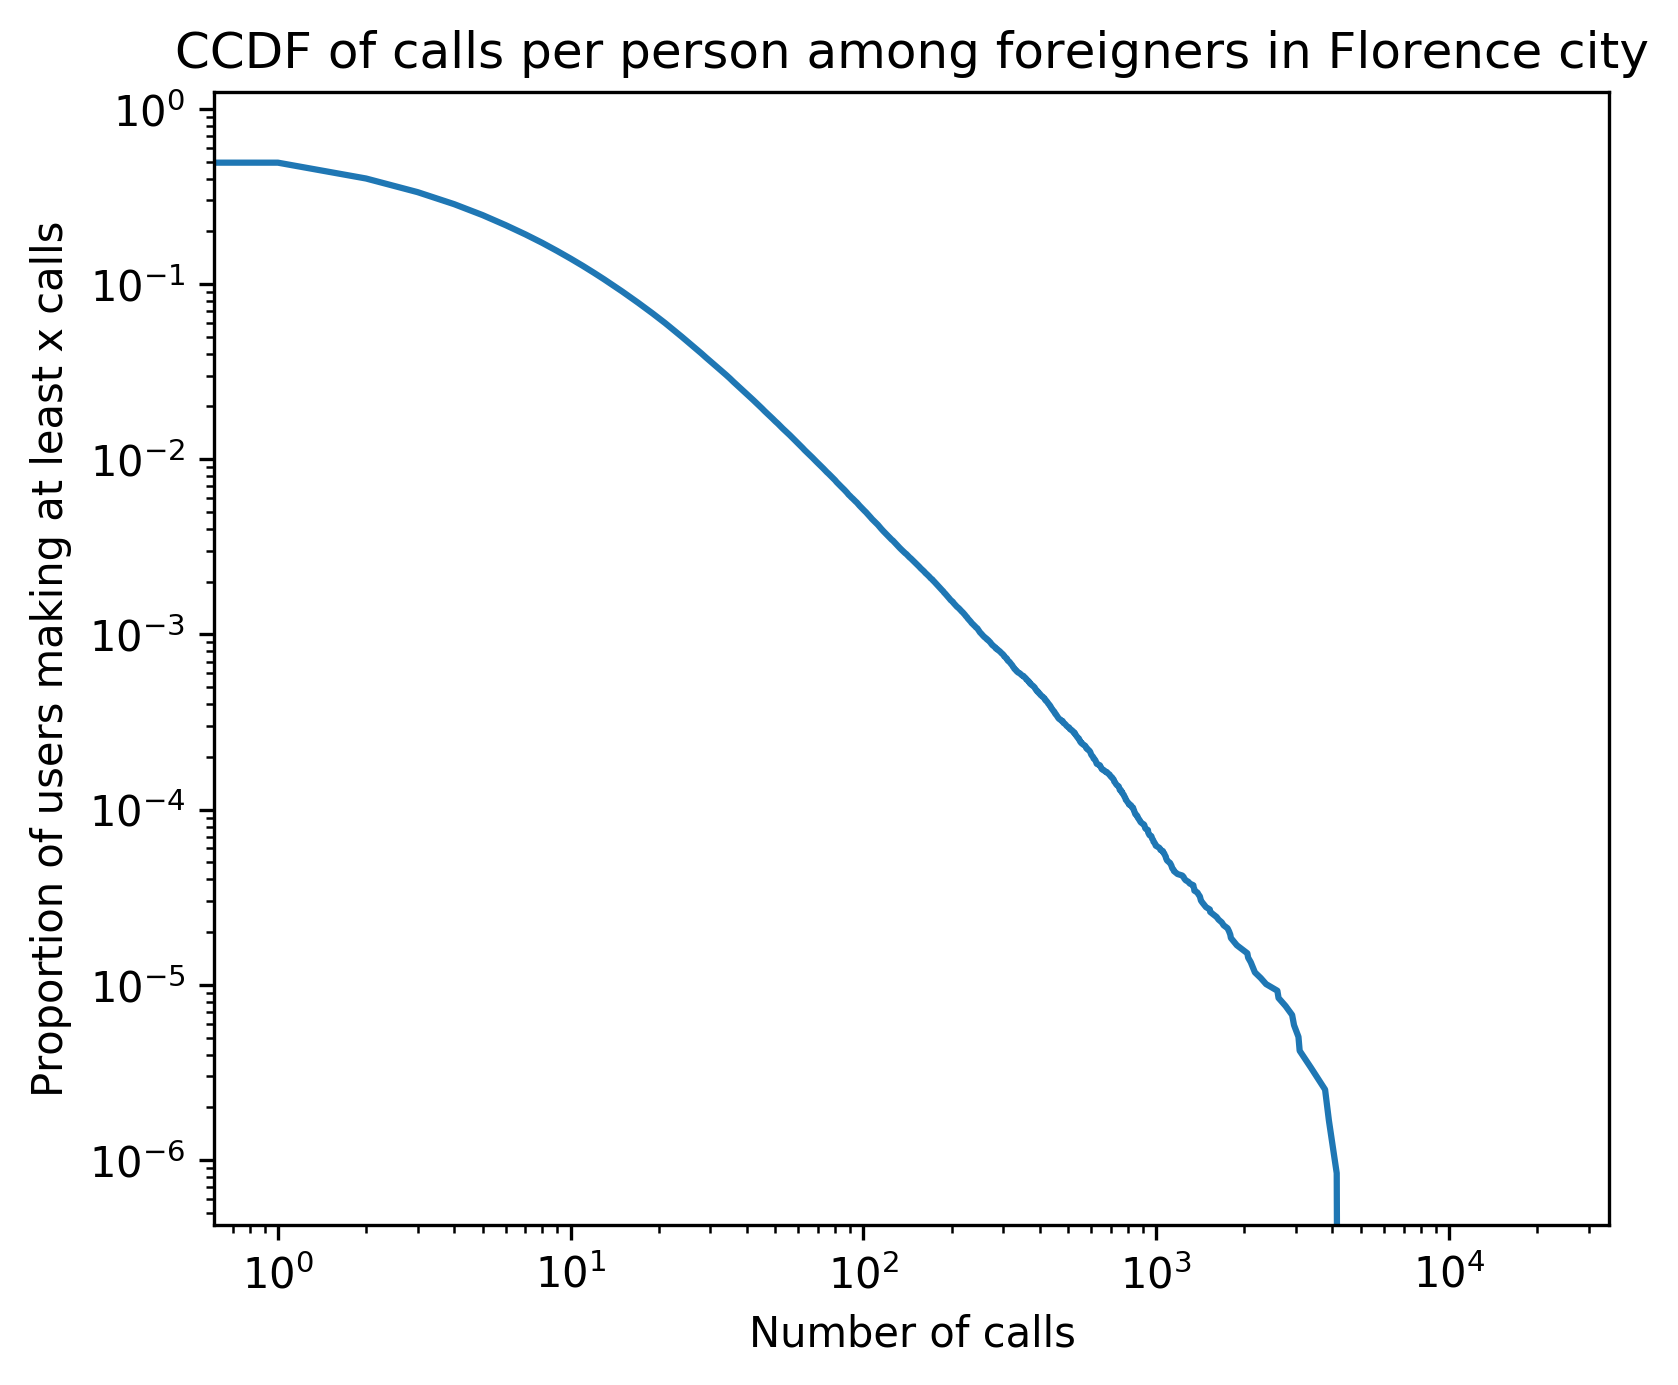

In [44]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.plot(frc_uc['calls_in_florence_comune'],frc_uc['ccdf'])
yscale('log')
xscale('log')
ax.set_title('CCDF of calls per person among foreigners in Florence city')
ax.set_ylabel('Proportion of users making at least x calls')
ax.set_xlabel('Number of calls')
plt.show()

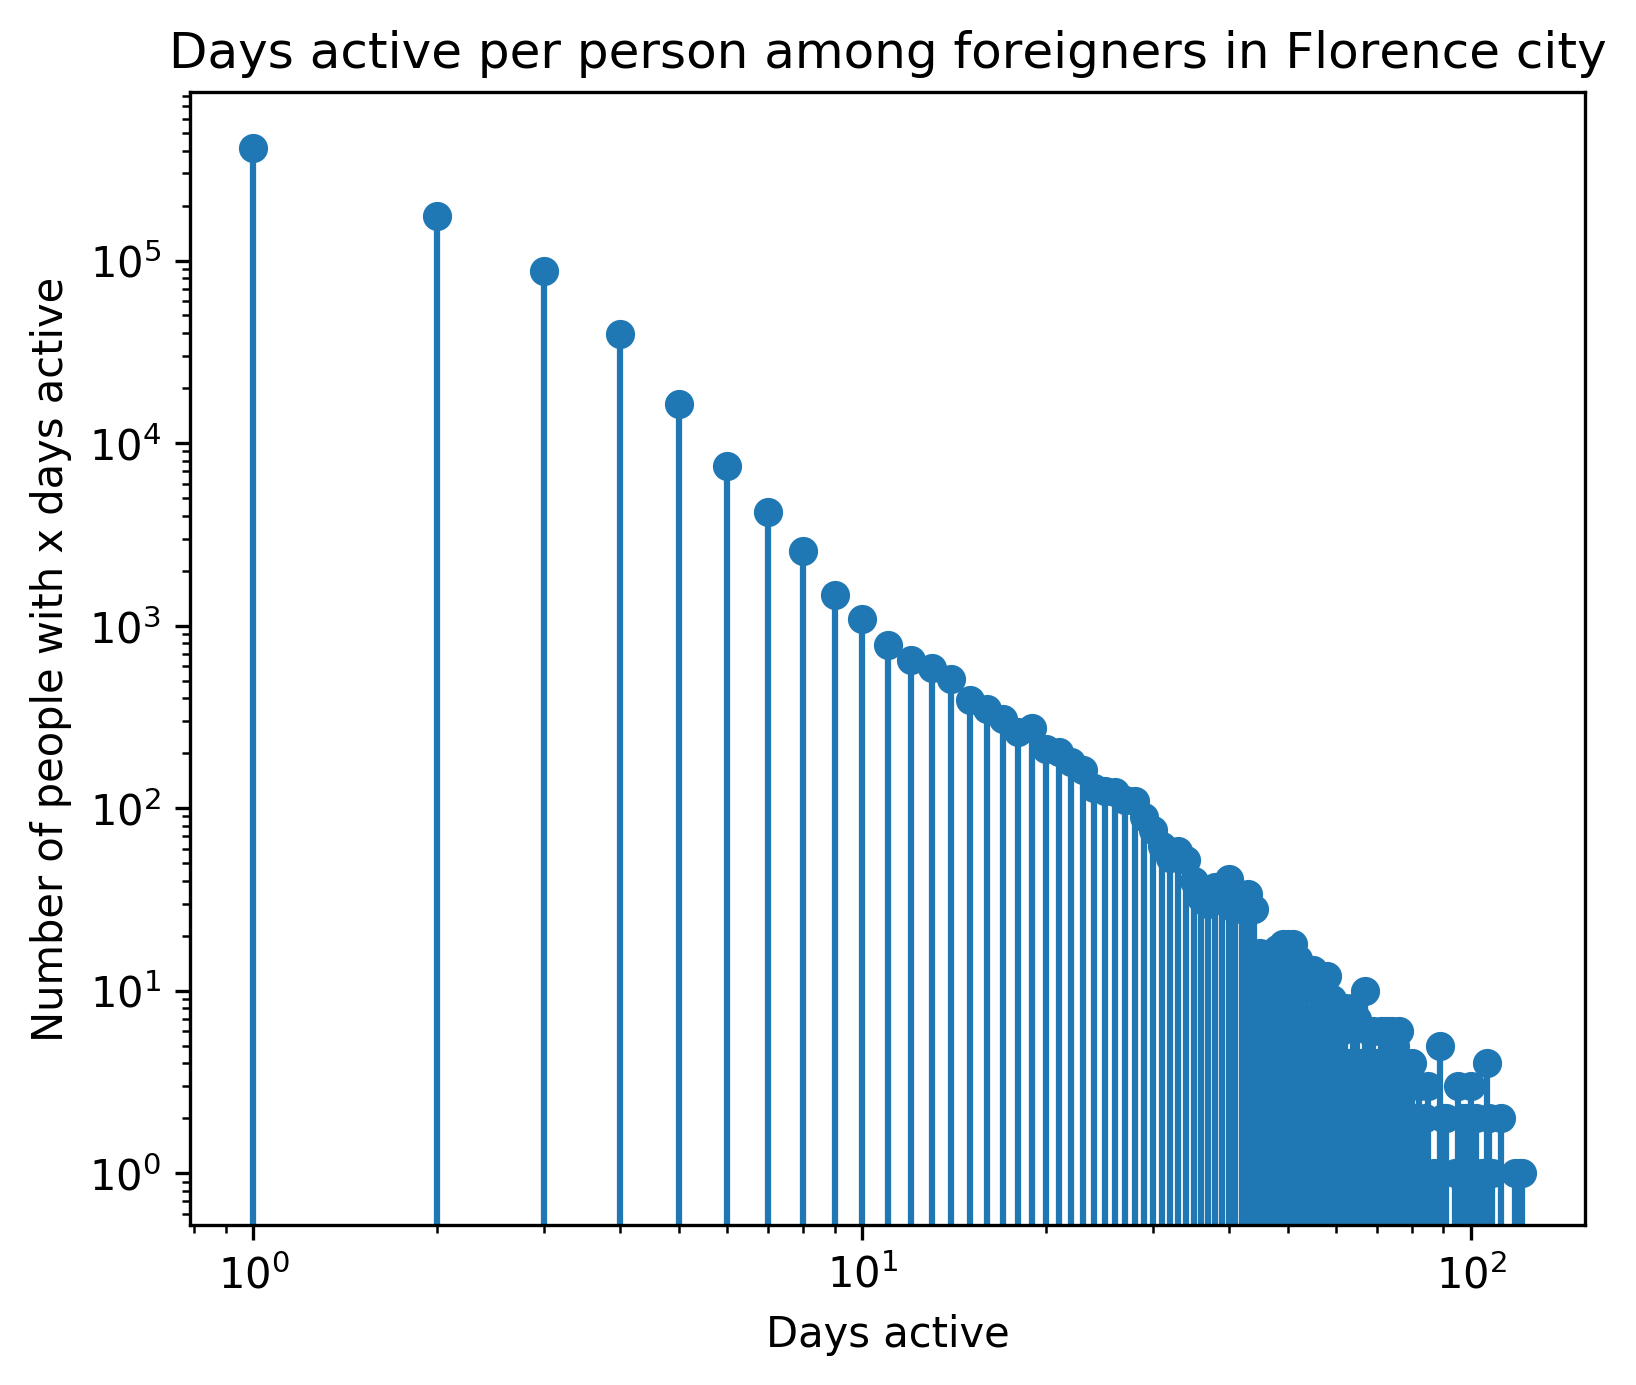

In [45]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.stem(frc_dc['days_active_in_florence_comune'],frc_dc['frequency'], linestyle='steps--')
yscale('log')
xscale('log')
ax.set_title('Days active per person among foreigners in Florence city')
ax.set_ylabel('Number of people with x days active')
ax.set_xlabel('Days active')
plt.show()

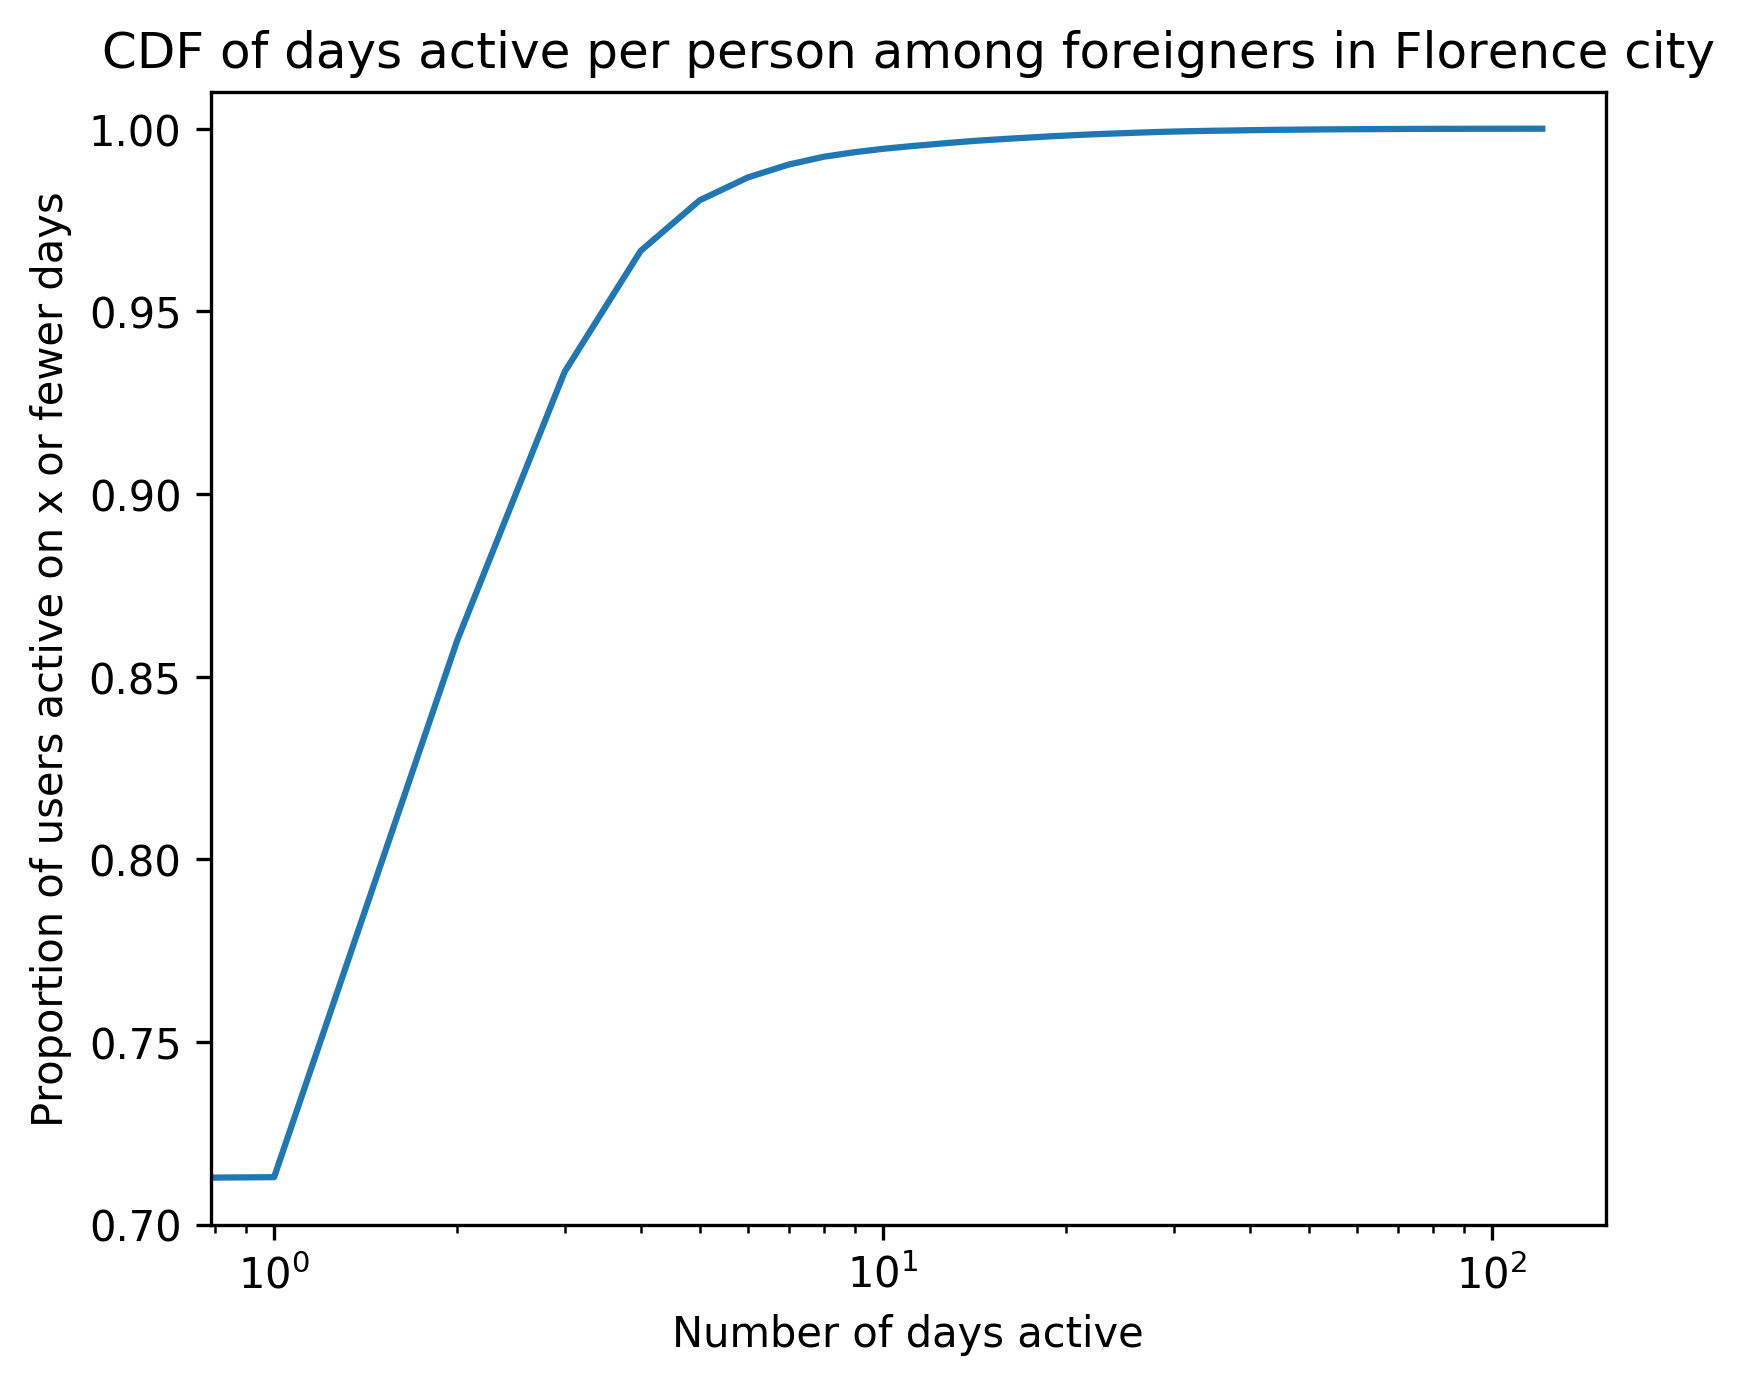

In [46]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.plot(frc_dc['days_active_in_florence_comune'],frc_dc['cumulative'])
# yscale('log')
xscale('log')
ylim([.7,1.01])
ax.set_title('CDF of days active per person among foreigners in Florence city')
ax.set_ylabel('Proportion of users active on x or fewer days')
ax.set_xlabel('Number of days active')
plt.show()

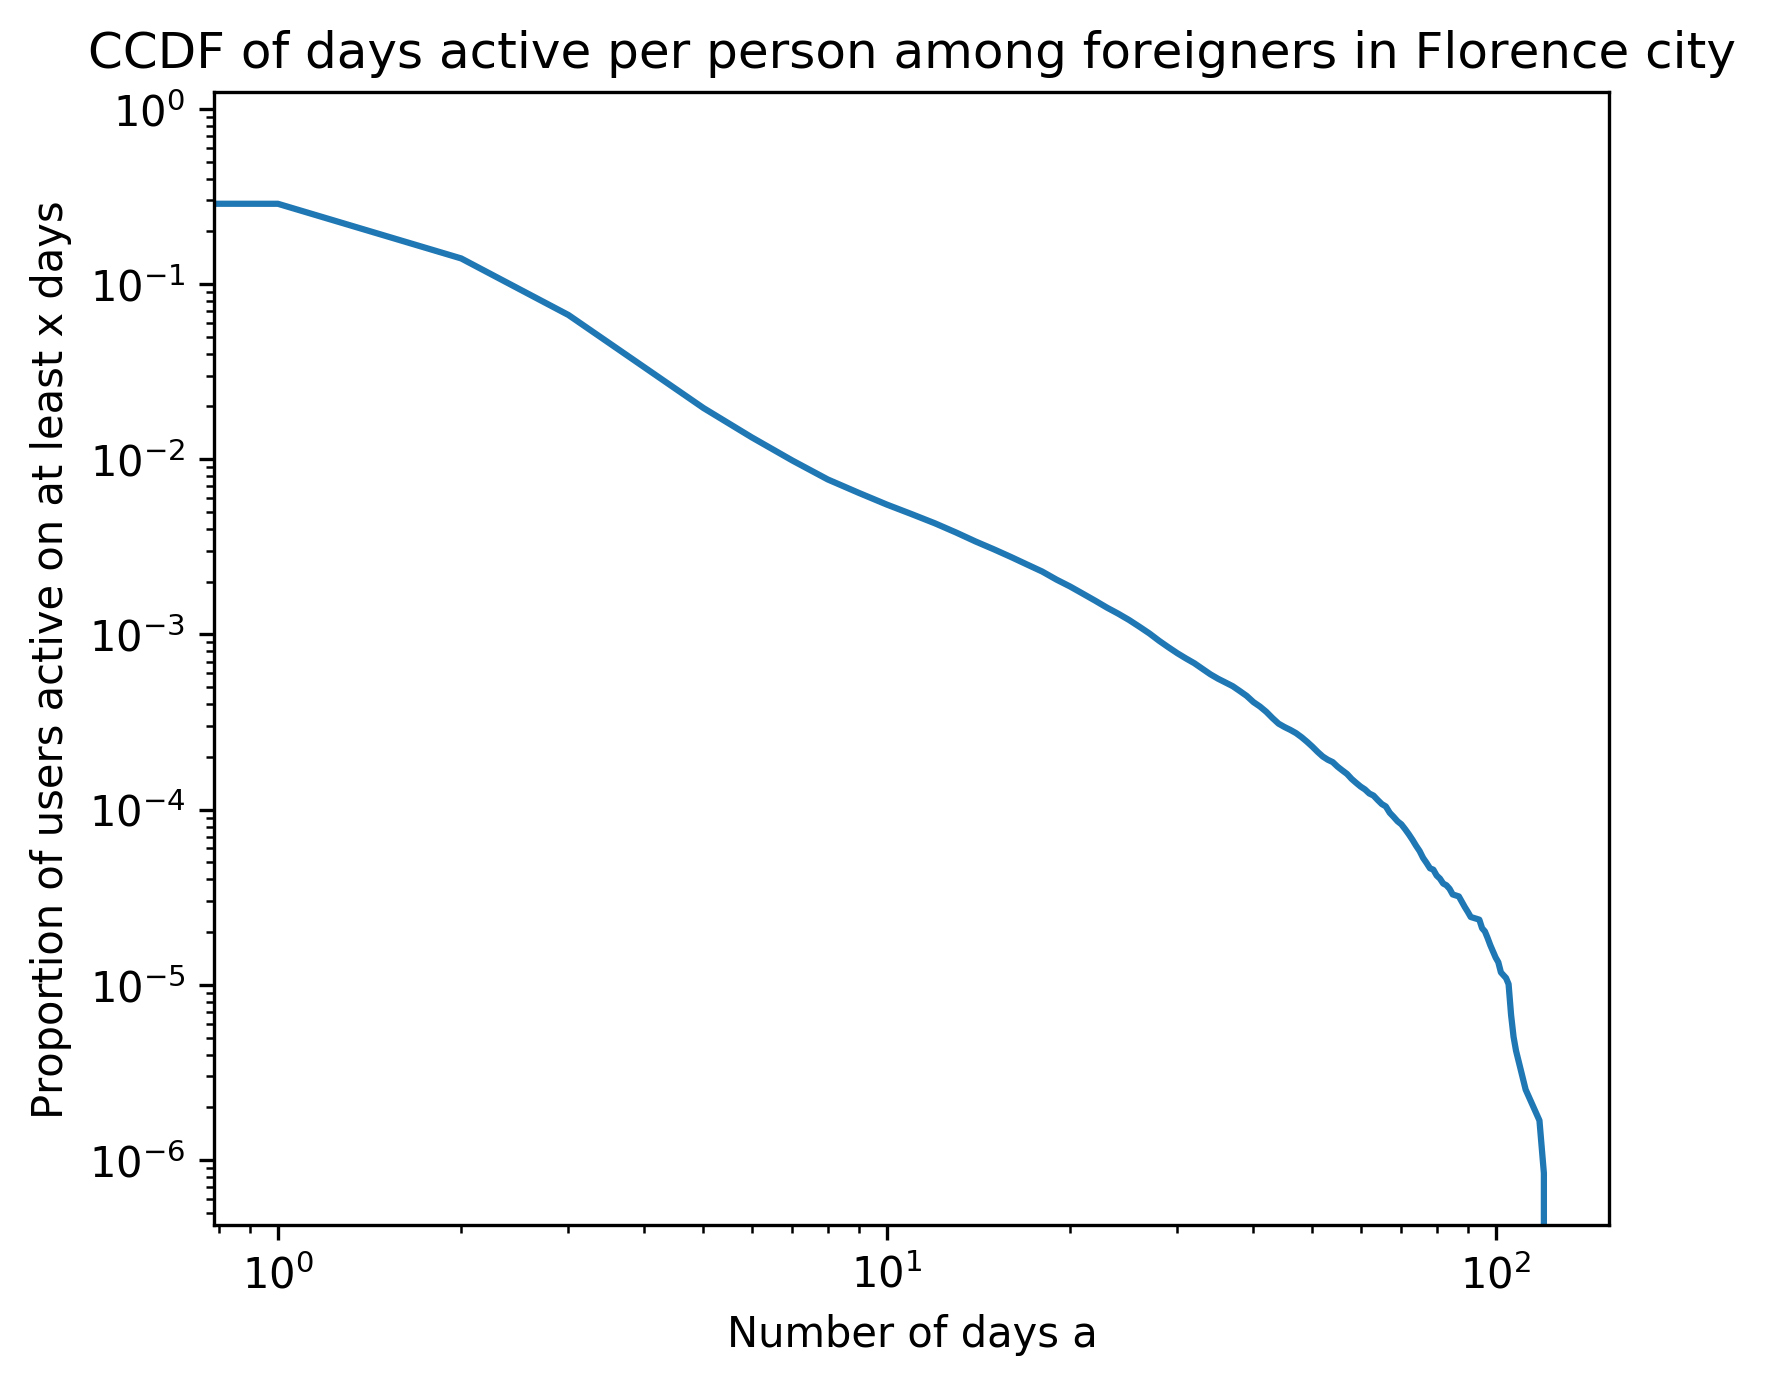

In [47]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.plot(frc_dc['days_active_in_florence_comune'],frc_dc['ccdf'])
yscale('log')
xscale('log')
ax.set_title('CCDF of days active per person among foreigners in Florence city')
ax.set_ylabel('Proportion of users active on at least x days')
ax.set_xlabel('Number of days a')
plt.show()

In [48]:
dfc['mean_calls_per_day'] = dfc['calls']/dfc['days_active']
dfc[dfc['calls_in_florence_comune']>0].head()

,cust_id,country,calls,calls_in_florence_comune,days_active,days_active_in_florence_comune,mean_calls_per_day
0,25304,Australia,430960,21469,106,106,4065.660377
1,4794145,Germany,49135,4,37,1,1327.972973
2,18418469,Sweden,48094,250,116,58,414.603448
3,3665186,Sweden,45927,207,88,37,521.897727
4,10668243,Montenegro,44134,561,96,80,459.729167


In [49]:
print dfc[dfc['calls_in_florence_comune']>0]['mean_calls_per_day'].max()
print dfc[dfc['calls_in_florence_comune']>0]['mean_calls_per_day'].min()
print dfc[dfc['calls_in_florence_comune']>0]['mean_calls_per_day'].mean()
print dfc[dfc['calls_in_florence_comune']>0]['mean_calls_per_day'].median()
print dfc[dfc['calls_in_florence_comune']>0]['mean_calls_per_day'].std()
print dfc[dfc['calls_in_florence_comune']>0]['mean_calls_per_day'].std()*2+dfc[dfc['calls_in_florence_comune']>0]['mean_calls_per_day'].mean()
print dfc[dfc['calls_in_florence_comune']>0]['mean_calls_per_day'].std()*3+dfc[dfc['calls_in_florence_comune']>0]['mean_calls_per_day'].mean()

4065.66037736
1.0
6.95290309293
4.5
13.5931820182
34.1392671294
47.7324491476


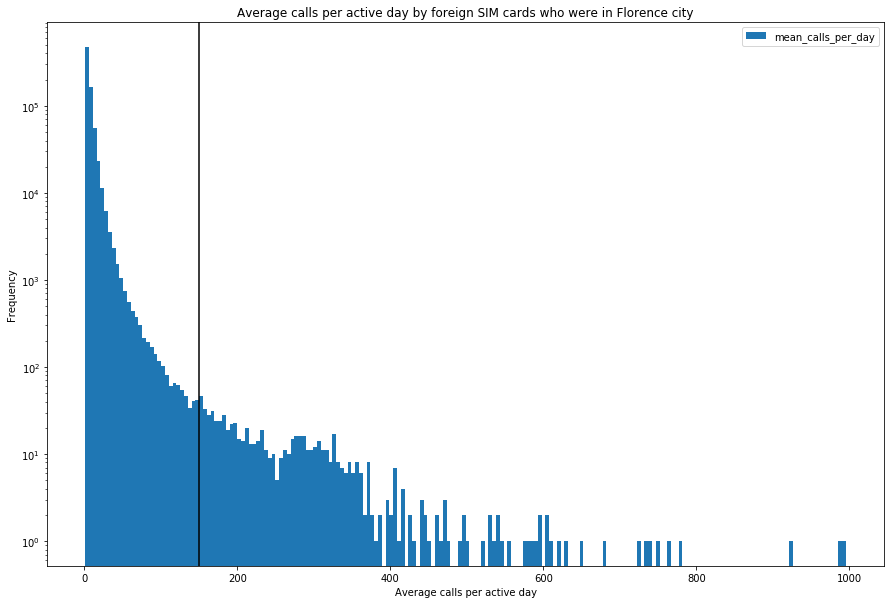

In [50]:
dfc[(dfc['calls_in_florence_comune']>0)&(dfc['mean_calls_per_day']<1000)].plot.hist(y='mean_calls_per_day', logy=True, figsize=(15,10), bins=200)
plt.ylabel('Frequency')
plt.xlabel('Average calls per active day')
plt.axvline(150,color="black")
# plt.xlim([0,1000])
plt.title('Average calls per active day by foreign SIM cards who were in Florence city')

In [18]:
# dfc.plot.scatter(x='calls',y='days_active',figsize=(15,10),logy=True,logx=True)

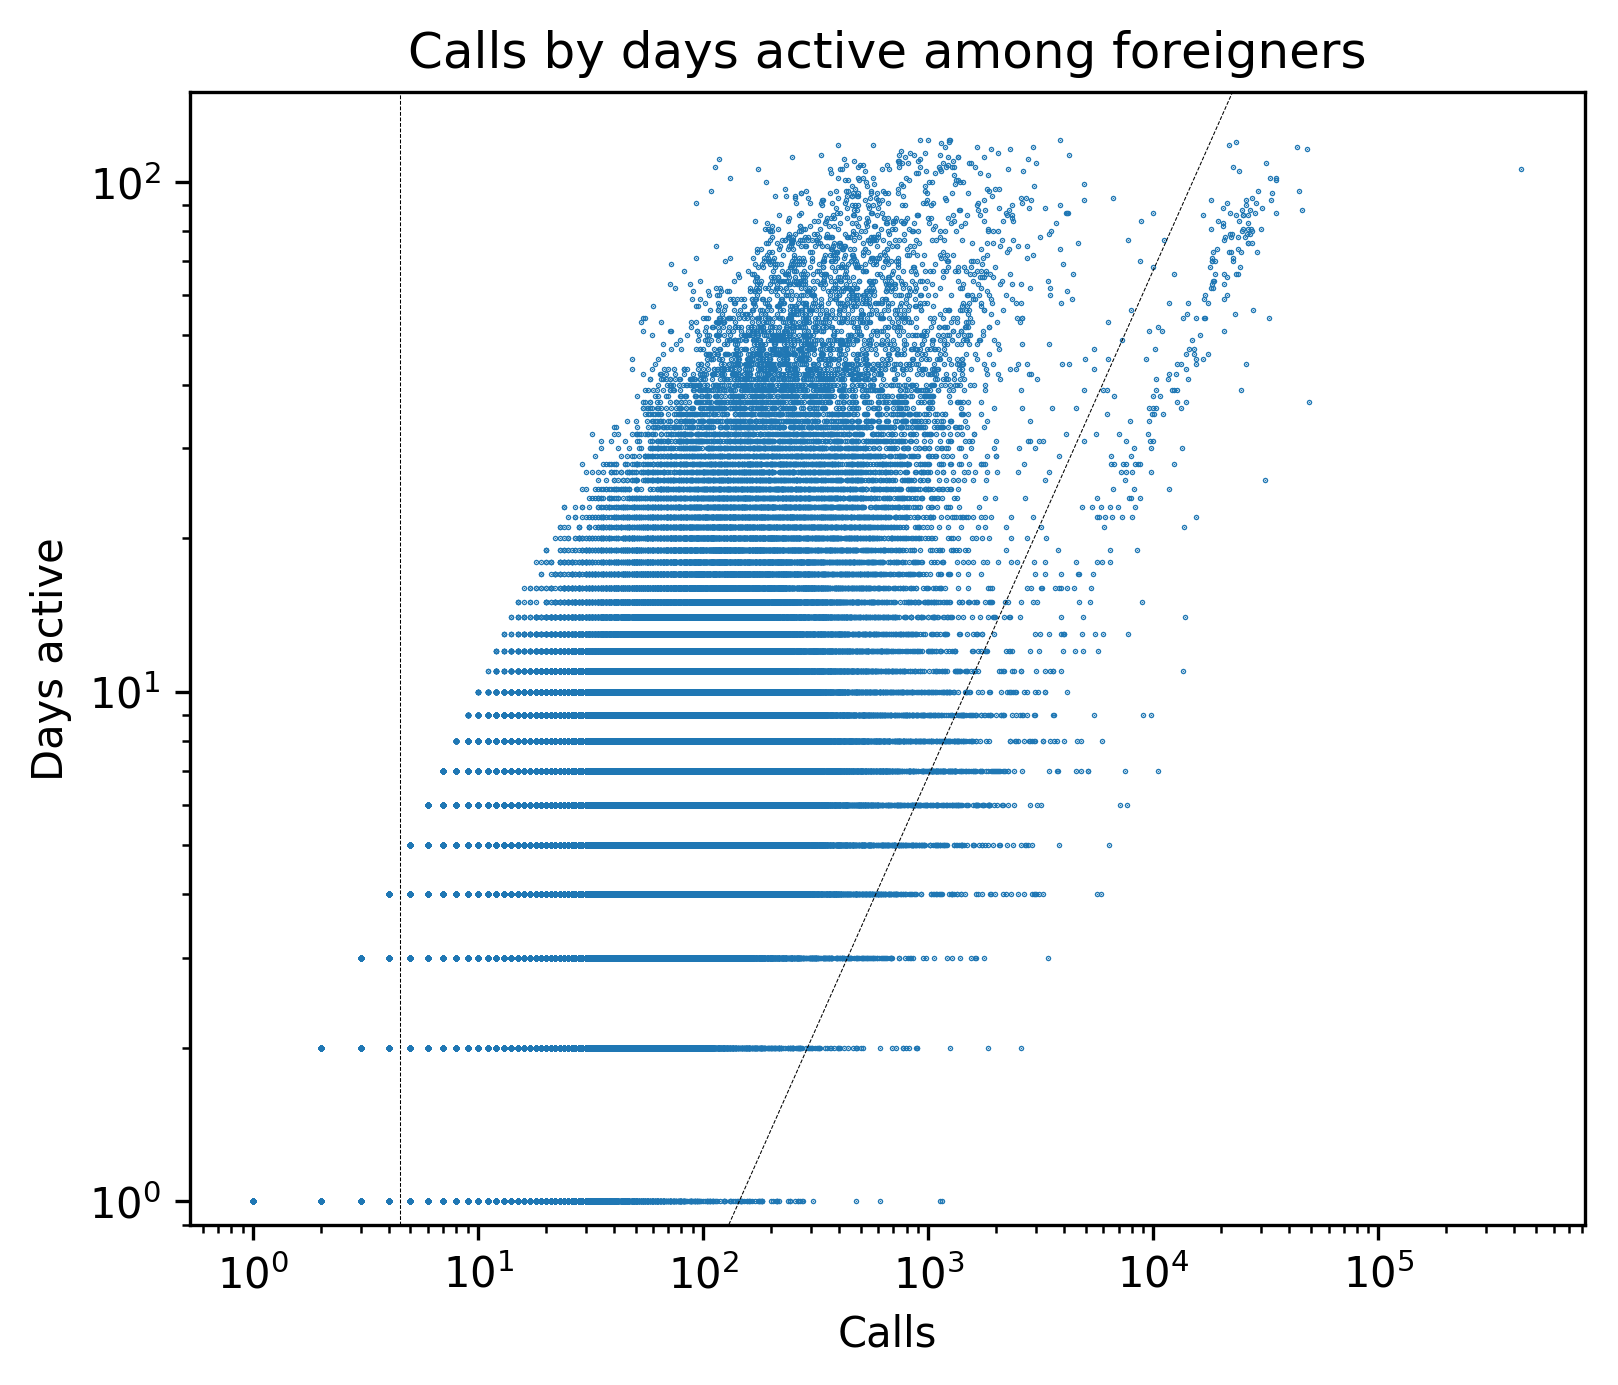

In [52]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.scatter(x=dfc['calls'],y=dfc['days_active'],s=.1)
yscale('log')
xscale('log')
ax.set_title('Calls by days active among foreigners')
ax.set_xlabel('Calls')
ax.set_ylabel('Days active')
y=[1/10000, 1*200]
x2=[150/10000, 150*200]
ylim([.9,150])
plt.plot(x2,y,color='black',linewidth=.25,ls='dashed')
ax.axvline(4.5,color='black',linewidth=.25,ls='dashed')
plt.show()

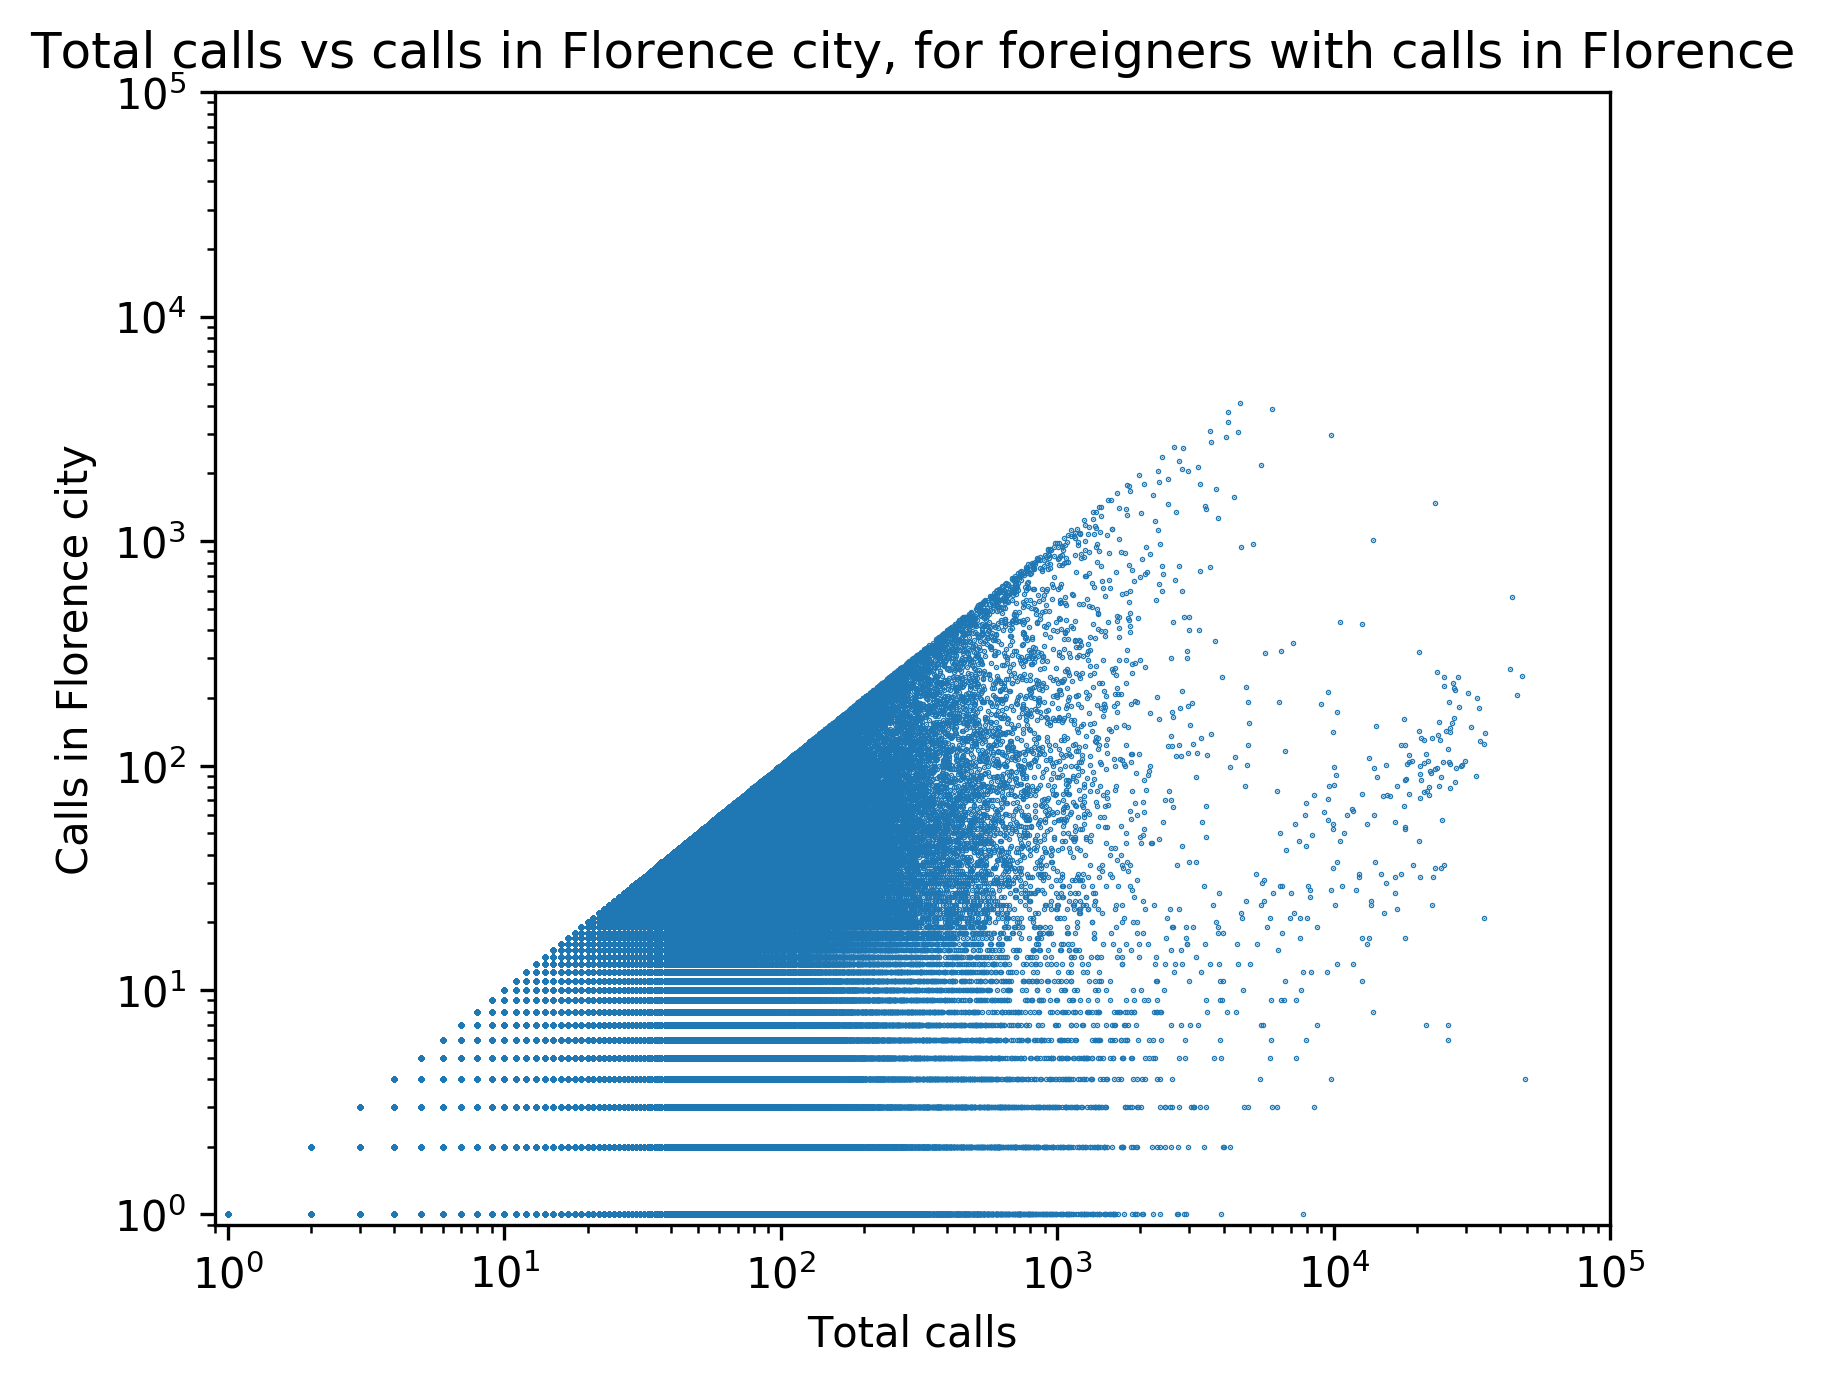

In [53]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.scatter(x=dfc['calls'],y=dfc['calls_in_florence_comune'],s=.1)
yscale('log')
xscale('log')
ax.set_title('Total calls vs calls in Florence city, for foreigners with calls in Florence')
ax.set_xlabel('Total calls')
ax.set_ylabel('Calls in Florence city')
xlim([.9,10*10000])
ylim([.9,10*10000])
plt.show()

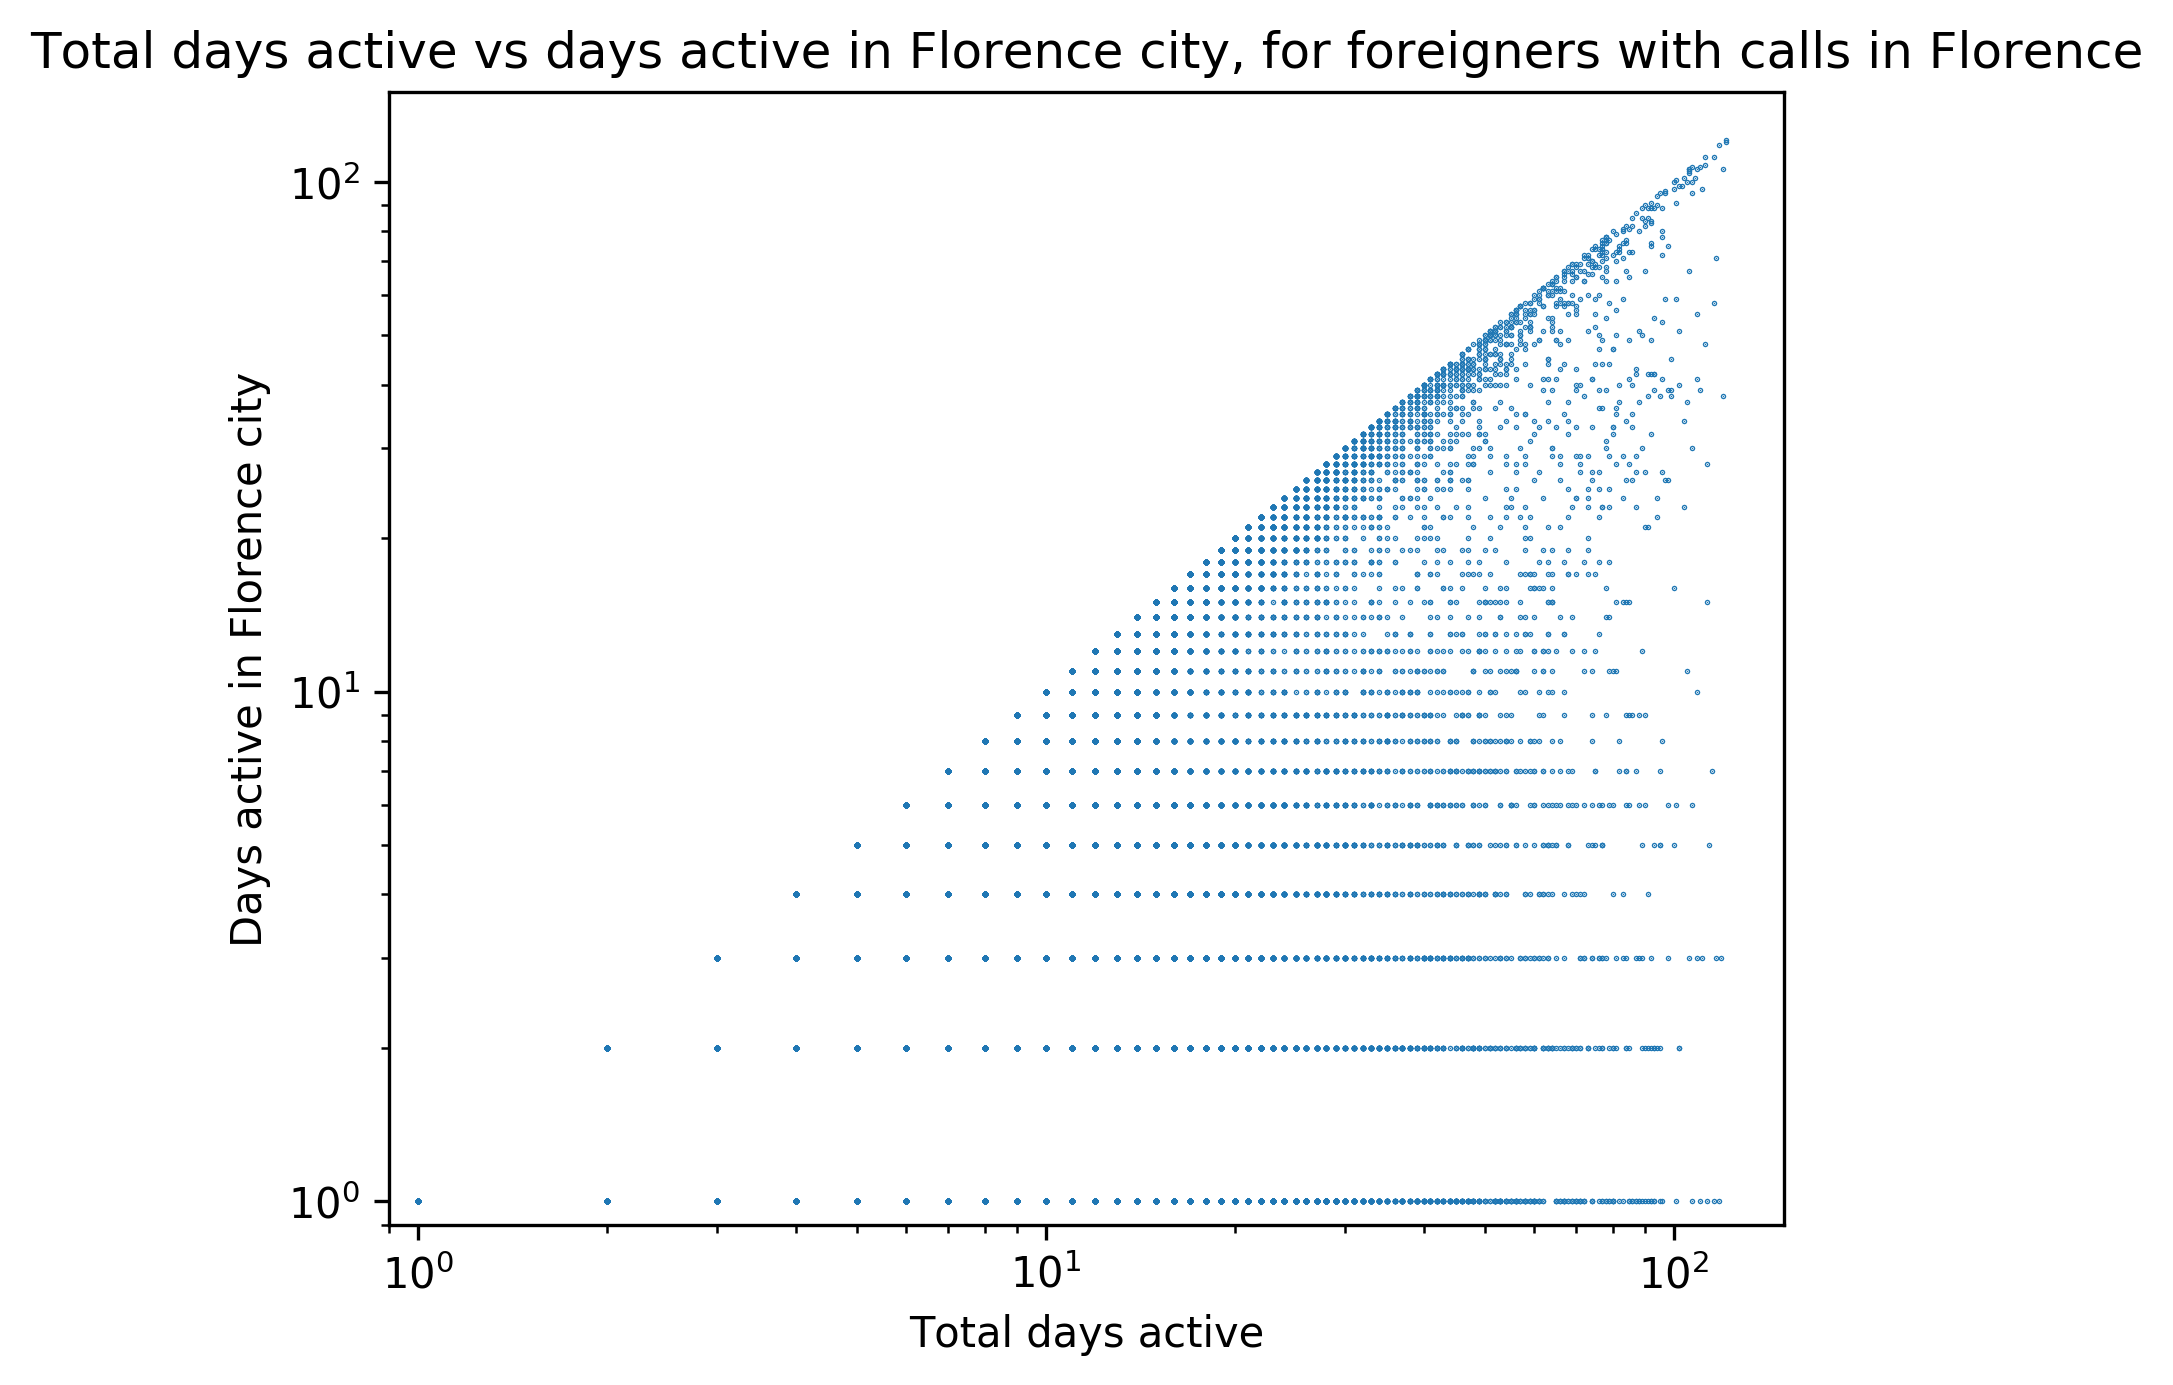

In [54]:
f, ax = plt.subplots(figsize=(6,5), dpi=300)
ax.scatter(x=dfc['days_active'],y=dfc['days_active_in_florence_comune'],s=.1)
yscale('log')
xscale('log')
ax.set_title('Total days active vs days active in Florence city, for foreigners with calls in Florence')
ax.set_xlabel('Total days active')
ax.set_ylabel('Days active in Florence city')
xlim([.9,15*10])
ylim([.9,15*10])
plt.show()